In [2]:
import pandas as pd

In [59]:
%matplotlib inline

In [10]:
a = {"b": "foo", "c": "one", "a": "small", "d": 1}
b = {"b": "foo", "c": "one", "a": "large", "d": 2}
c = {"b": "foo", "c": "one", "a": "large", "d": 2}
d = {"b": "foo", "c": "two", "a": "small", "d": 3}
e = {"b": "foo", "c": "two", "a": "small", "d": 3}
f = {"b": "bar", "c": "one", "a": "large", "d": 4}
g = {"b": "bar", "c": "one", "a": "small", "d": 5}
h = {"b": "bar", "c": "two", "a": "small", "d": 6}
i = {"b": "bar", "c": "two", "a": "large", "d": 7}
df = pd.DataFrame([a, b, c, d, e, f, g, h, i])
df = df.rename(columns={"a": "C", "b": "A", "c": "B", "d": "D"})

In [3]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.tools.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True)
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table index.
        If an array is passed, it is being used as the same manner as column values.
    columns : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table column.
        If an array is passed, it is being used as the same manner as column values.
    aggfunc : function, default numpy.mean, or list of functions

In [13]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc="sum")

In [14]:
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two    NaN      6

In [15]:
df

,C,A,B,D
0,small,foo,one,1
1,large,foo,one,2
2,large,foo,one,2
3,small,foo,two,3
4,small,foo,two,3
5,large,bar,one,4
6,small,bar,one,5
7,small,bar,two,6
8,large,bar,two,7


In [29]:
pd.pivot_table(df, values='D', index=['B', 'A'], columns=['C'], aggfunc="sum")

C        large  small
B   A                
one bar      4      5
    foo      4      1
two bar      7      6
    foo    NaN      6

In [31]:
world_data = pd.read_csv("data/world_data.csv")

In [44]:
world_data.columns.values

array(['\ufeffCountry Name', 'Country Code', 'Series Name', 'Series Code',
       '2000 [YR2000]', '2013 [YR2013]'], dtype=object)

In [47]:
world_data = world_data.rename(columns={"\ufeffCountry Name": "Country Name"})

In [52]:
world_index = world_data[["Country Name", "Series Name", "2000 [YR2000]", "2013 [YR2013]"]]

In [75]:
world_index.head()

,Country Name,Series Name,2000 [YR2000],2013 [YR2013]
0,Afghanistan,"School enrollment, secondary (% gross)",NaN,54.310841
1,Afghanistan,"Life expectancy at birth, total (years)",54.848561,60.931415
2,Afghanistan,Improved sanitation facilities (% of populatio...,23.200000,NaN
3,Afghanistan,Improved water source (% of population with ac...,22.100000,NaN
4,Afghanistan,"Immunization, measles (% of children ages 12-2...",27.000000,75.000000


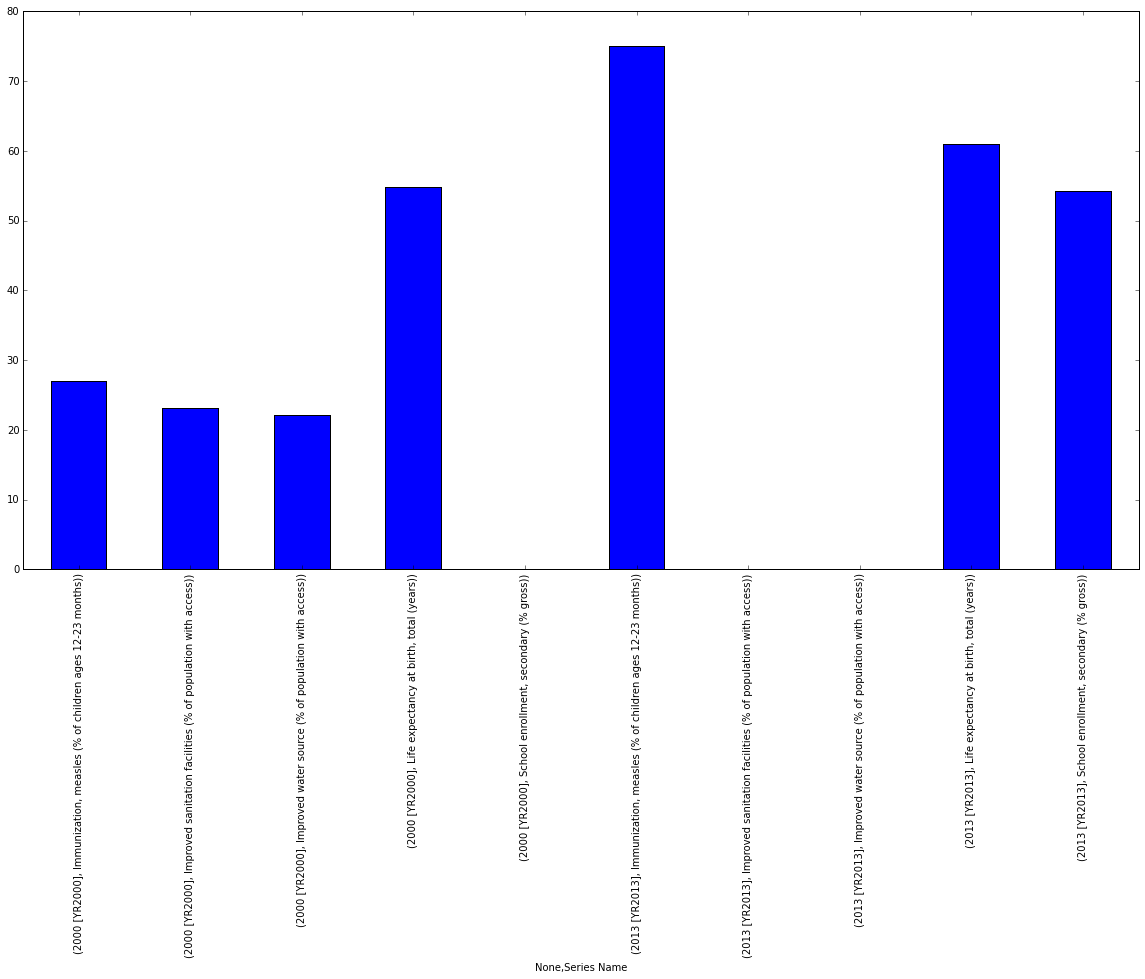

In [103]:
# pd.pivot_table(df, values='D', index=['B', 'A'], columns=['C'], aggfunc="sum")

pd.pivot_table(world_index, columns=["Series Name"], index=["Country Name"]).loc["Afghanistan"].plot(kind="bar", legend=False, figsize=(20, 10))

In [91]:
world_index.stack().to_frame()

0
0    Country Name                                         Afghanistan
     Series Name               School enrollment, secondary (% gross)
     2013 [YR2013]                                            54.3108
1    Country Name                                         Afghanistan
     Series Name              Life expectancy at birth, total (years)
     2000 [YR2000]                                            54.8486
     2013 [YR2013]                                            60.9314
2    Country Name                                         Afghanistan
     Series Name    Improved sanitation facilities (% of populatio...
     2000 [YR2000]                                               23.2
3    Country Name                                         Afghanistan
     Series Name    Improved water source (% of population with ac...
     2000 [YR2000]                                               22.1
4    Country Name                                         Afghanistan
     Series Name    Immunization, measles (% of children ages 12-2...
     2000 [YR2000]                                                 27
     2013 [YR2013]                                                 75
5    Country Name                                             Albania
     Series Name               School enrollment, secondary (% gross)
     2000 [YR2000]                                            66.6789
6    Country Name                                             Albania
     Series Name              Life expectancy at birth, total (years)
     2000 [YR2000]                                            74.2721
     2013 [YR2013]                                            77.5372
7    Country Name                                             Albania
     Series Name    Improved sanitation facilities (% of populatio...
     2000 [YR2000]                                               83.8
8    Country Name                                             Albania
     Series Name    Improved water source (% of population with ac...
     2000 [YR2000]                                               96.5
...                                                               ...
1061 2013 [YR2013]                                            58.0928
1062 Country Name                                              Zambia
     Series Name    Improved sanitation facilities (% of populatio...
     2000 [YR2000]                                               40.7
1063 Country Name                                              Zambia
     Series Name    Improved water source (% of population with ac...
     2000 [YR2000]                                               53.1
1064 Country Name                                              Zambia
     Series Name    Immunization, measles (% of children ages 12-2...
     2000 [YR2000]                                                 85
     2013 [YR2013]                                                 80
1065 Country Name                                            Zimbabwe
     Series Name               School enrollment, secondary (% gross)
     2000 [YR2000]                                            42.7169
1066 Country Name                                            Zimbabwe
     Series Name              Life expectancy at birth, total (years)
     2000 [YR2000]                                             43.922
     2013 [YR2013]                                            59.7735
1067 Country Name                                            Zimbabwe
     Series Name    Improved sanitation facilities (% of populatio...
     2000 [YR2000]                                               40.3
1068 Country Name                                            Zimbabwe
     Series Name    Improved water source (% of population with ac...
     2000 [YR2000]                                               79.5
1069 Country Name                                            Zimbabwe
     Series Name    Immunization, measles (% of children ages 12-2...
     200